# Explore here

IMPORTACION DE BIBLIOTECAS NECESARIAS|
---------------------------------

In [24]:
# Manejo de datos
import pandas as pd
import numpy as np
# Graficos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Funciones EDA
import eda_functions    # grupo de funciones utiles para el eda, creado por mi....y chatgpt
# Preparacion de datos para el modelo y Optimizacion de hipermarametros
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
# Metricas para calificar el modelo
from sklearn.metrics import *
# Exportar modelo
import joblib



---------------------------------------------------------------------------------------------------------------

IMPORTADO DE DATOS Y ANALISIS INICIAL|
--------------------------------------

In [3]:
# Importamos el dataset desde la url y lo guardamos en un archivo local
'''url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
pd.read_csv(url).to_csv('diabetes.csv')'''
# Cargamos el dataset desde el archivo local
df = pd.read_csv('diabetes.csv')
# Mostramos todas las columnas
pd.set_option('display.max_columns', None)
# Mostramos las primeras 5 filas
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Informacion general del dataset
eda_functions.df_info(df)

,nunique,nulls,percent_nulls,Dtype,non_null,total_values
Unnamed: 0,768,0,0.0,int64,768,768
Pregnancies,17,0,0.0,int64,768,768
Glucose,136,0,0.0,int64,768,768
BloodPressure,47,0,0.0,int64,768,768
SkinThickness,51,0,0.0,int64,768,768
Insulin,186,0,0.0,int64,768,768
BMI,248,0,0.0,float64,768,768
DiabetesPedigreeFunction,517,0,0.0,float64,768,768
Age,52,0,0.0,int64,768,768
Outcome,2,0,0.0,int64,768,768


Dtype
int64      8
float64    2
Name: count, dtype: int64

El dataframe tiene 768 filas y 10 columnas
Hay 0 valores duplicados


Conclusiones del analisis inicial:

- De las 10 columnas de que consta el dataframe 9 son marcadores fisiologicos y todos son numericos

- La columna unnamed: 0 sera eliminada ya que no es mas que un indice que no aporta imformacion

- No hay nulos ni duplicados

In [5]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Analisis de estadisticas:

- Desgraciadamente mi desconocimiento del ambito de este dataframe no me permite extraer ciertas conclusiones ya que ignoro que valores pueden estar fuera de los rangos normales.

- Dentro de lo que sí conozco esta el hecho de que hay valores de cero en los minimos de ciertas variables que probablemente son erroneos como la presion sanguinea o el bmi.

- Los rangos de edad son razonables 

- El BMI minimo de 32 podria indicar sobrepeso en todos los individuos de la muestra.

- El promedio de embarazos es muy elevado y el hecho de que el primer 

--------------------------------------------------------------------------------------------------------------

ANALISIS Y LIMPIEZA DEL CONJUNTO DE DATOS|
------------------------------

-------------------------------------------------------------------------------

Eliminamos datos anomalos y columnas innecesarias

---------------------------------------------------------------------------

In [6]:
# Filtramos el dataset para eliminar los valores cero de las columnas Glucose, BMI y BloodPressure
df = df[(df['Glucose'] != 0) &(df['BMI'] != 0) & (df['BloodPressure'] != 0)]

In [7]:
# Mostramos las dimensiones del dataset despues de filtrar
df.shape

(724, 10)

In [8]:
# Eliminamos el indice Unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Eliminamos nan y duplicados si los hubiera
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# Comprobamos las dimensiones del dataset despues de eliminar duplicados y nan
df.shape

(724, 9)

-------------------------------------------------------------------------------

Despues de filtrar valores de cero en ciertas columnas se han eliminado 44 filas

--------------------------------------------------------------------------------

-------------------------------------------------------------------------------

Graficamos las columnas para observar su distribucion y otros posibles valores anomalos

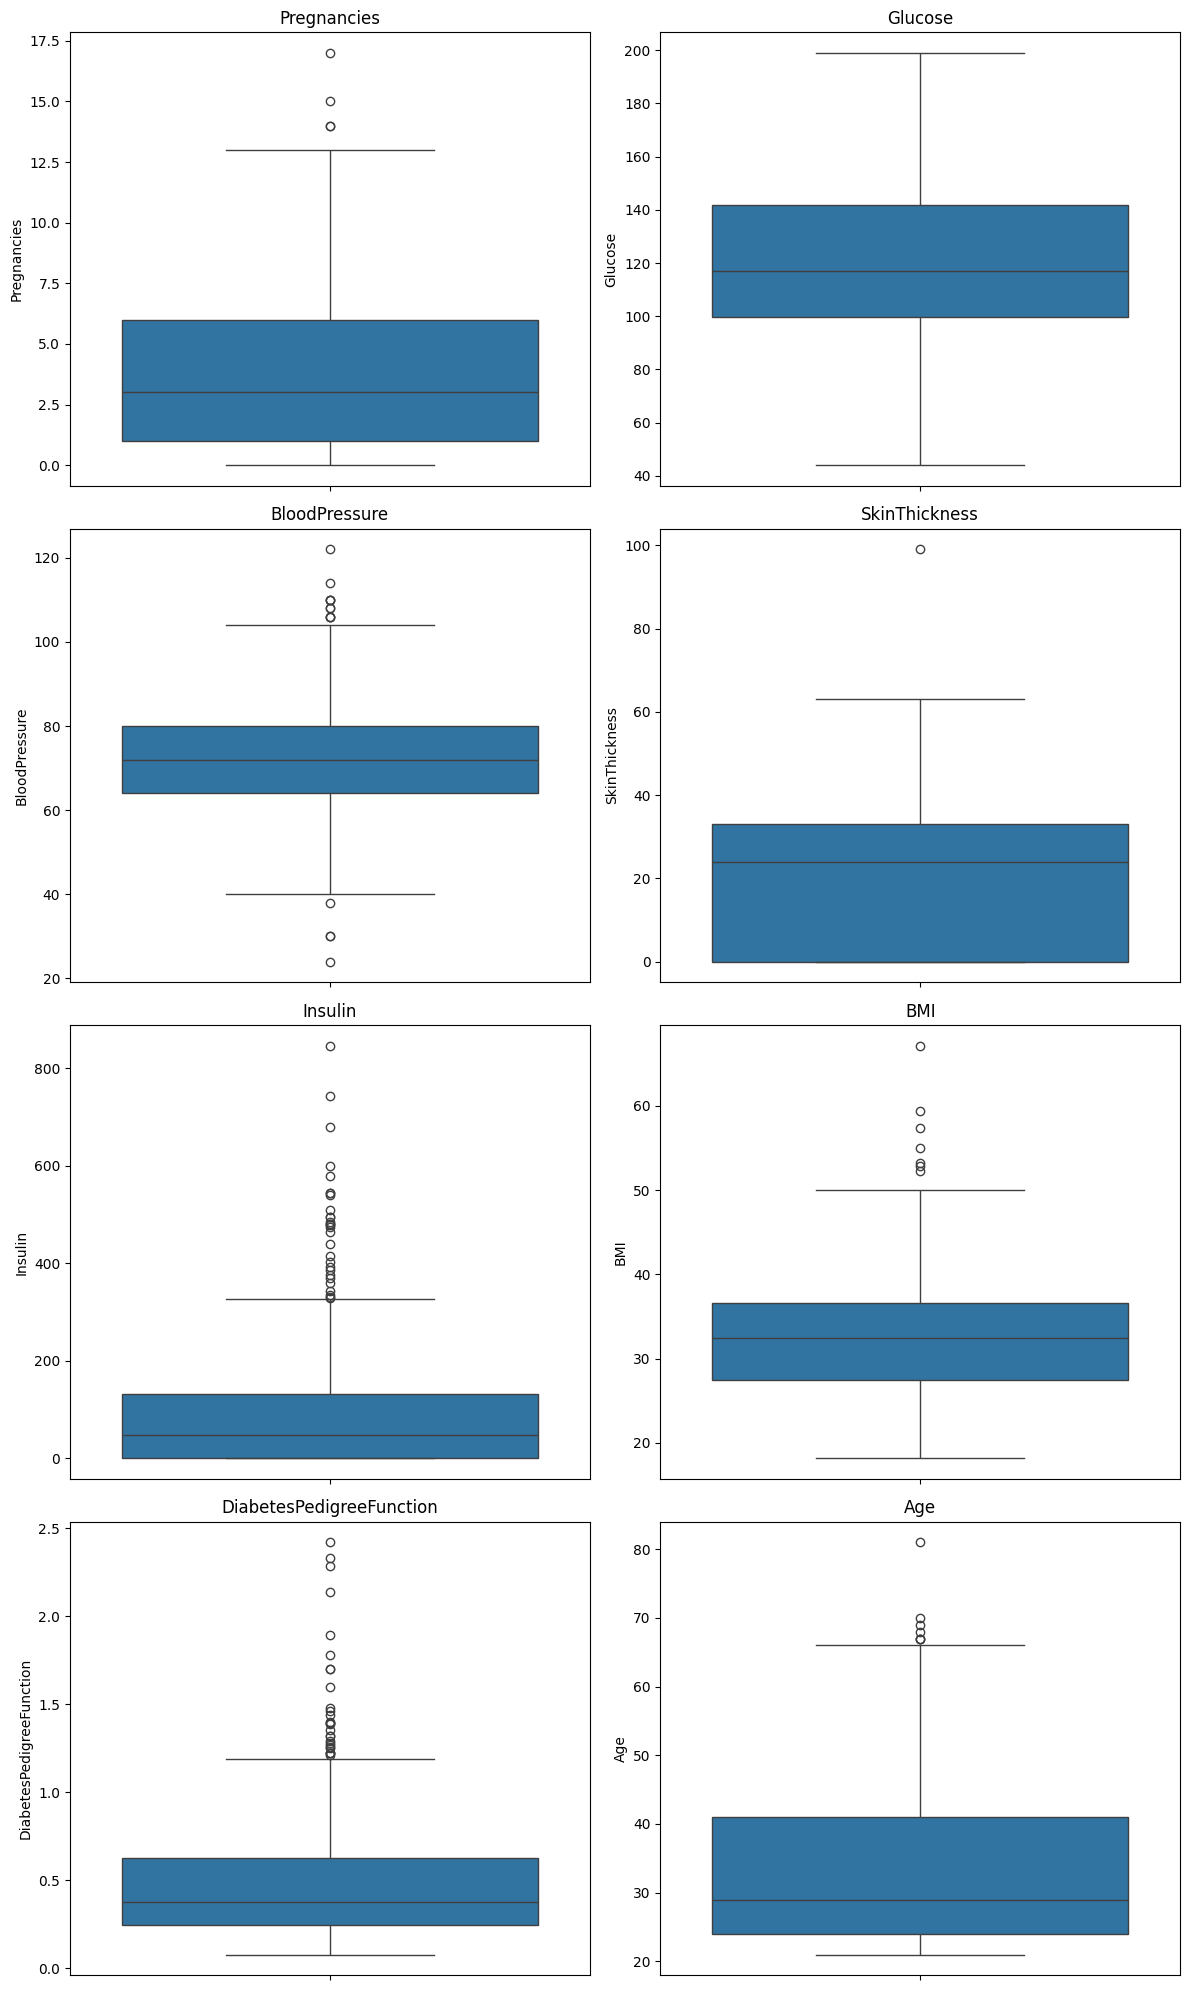

In [11]:
# Definimos lista con las colulmnas a graficar
columnas =['Pregnancies','Glucose',	'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',	'Age']
# Graficos de las variables para obervar su distribucion
eda_functions.multi_boxplot(df, columnas, 4, 2)

Dentro de las distribuciones de las variables.

- 'Pregnancies' tiene una ditribucion sesgada a derecha con ciertos valores muy altos, sobre los 17 embarazos. No obstante es posible y no parece un dato incorrecto. Ademas, solo hay 3 outliers por lo que en ultima instancia no afectaria en exceso a un modelo de tipo arbol.

- 'glucose' tiene una distribucion normal, sin outliers, con mediana en torno a 120

- 'Bloodpressure' tiene algunos ouliers altos y bajos pero su distribucion es aproximadamente normal, algo leptocurtica.

- 'SkinThickness': ignoro que se puede considerar normal en este dato por lo que confiaremos en la robustez de los arboles de decision.

- 'insulin' distribucion muy sesgada a derecha

- 'BMI' distribucion sesgada a derecha con algunos valores muy altos que indicarian obesidad severa del individuo y una mediana de alrededor de 30 que indicaria cierta tendencia al sobrepeso en la muestra.

- 'DiabetesPedigreeFunction' es un marcador de rasgos hereditarios de la diabetes. Se considera que cuanto mayor es el indice, mayhor es la predisposicion genetica a sufrir la enfermedad. Sabiendo esto y observando la grafica, deducimos que un alto porcentaje de la muestra no tiene una alta predisposicion genetica a la enfermedad pero hay un conjunto de outliers a los que habria que prestar especial atencion en un contexto clinico.

- 'age', con media en torno a los 30 años pero cierto sesgo a derecha, a valores mas altos y cinco valores por encima de los 65 años hasta los 81 aprox.

<Axes: xlabel='Outcome', ylabel='count'>

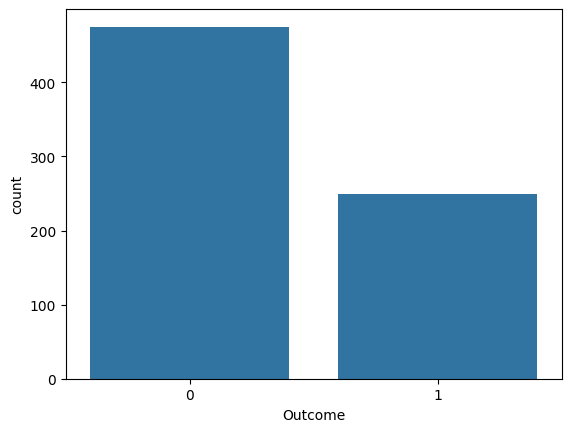

In [12]:
# Countplot de la variable objetivo
sns.countplot(x='Outcome', data=df)

-------------------------------------------------------------------------------------------------------------

CONCLUSION|
-----------

- Si bien los outliers no afectan en exceso a los modelos de arbol de decision, deberian eliminarse aquellos que pudieran considerarse datos incorrectos pero, dentro de los datos que puedo valorar segun mis conocimientos, todos parecen razonables. Puede que sean muy altos o muy bajos pero son posibles.

- Al graficar la variable objetivo vemos que en la muestra hay 1/3 de individuos diabeticos (aprox. 250 de 750)

- Al eliminar valores cero de ciertas columnas hemos reducido la dimesion del dataset de 768 a 724.

--------------------------------------------------------------------------------------------------------------

                                Final del Analisis y limpieza de datos
                                -------------------------------------

MODELO Y BUSQUEDA DE HIPERPARAMETROS|
------------------------------------

- Como solicita la practica nos limitaremos a implementar un modelo de arbol de decision y mejorar sus hiperparametros

- El dataframe final para el modelo consta de 724 filas, 8 columnas predictoras y la columna 'outcome' como target binario.

In [13]:
# Separamos las variables predictoras de la variable objetivo
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exportamos el dataframe ya preparado para la practica siguiente
df.to_csv('diabetes_clean.csv', index=False)



In [15]:


model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Predecimos los valores de la variable objetivo en el dataset de prueba
y_pred = model.predict(X_test)

In [ ]:
# Claculamos la precision del model0
accuracy_score(y_test, y_pred)

0.7172413793103448

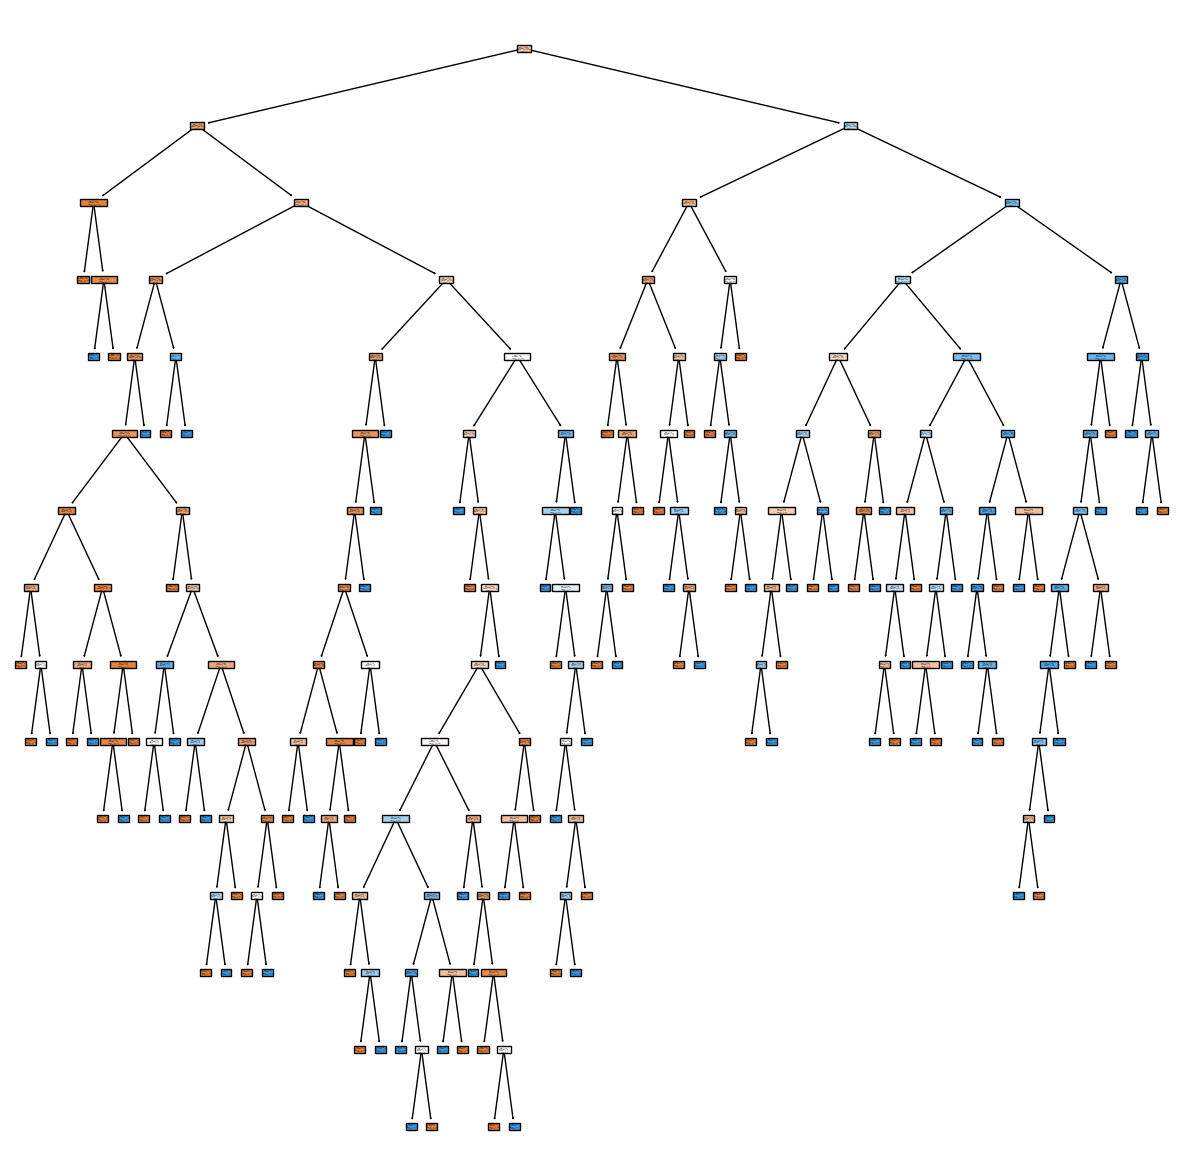

In [17]:
# Graficamos la distribucion del arbol de decision
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

---------------------------------------------------------------------------------------------------------------

##### BUSQUEDA DE MEJORES VALORES PARA HIPERPARAMETROS CON RANDOMIZEDSEARCHCV

In [19]:
model_adj_hiperp = DecisionTreeClassifier()
# Definimos los rangos de los hiperparametros para la busqueda aleatoria
param_dict = {'criterion': ['gini', 'entropy', 'log_loss'],
              'min_samples_split': np.arange(2, 50, 1,),
              'min_samples_leaf' : np.arange(1, 50, 1,),
              'max_features': ['sqrt','log2'],
              'max_depth': np.arange(20, 500, 10),
              'max_leaf_nodes': np.arange(2, 100, 10),
              'splitter': ['best', 'random']}
# Instanciamos RandomizedSearchCV con el modelo y los hiperparametros definidos en param_dict
random_search = RandomizedSearchCV(model_adj_hiperp, param_distributions=param_dict,cv=50,n_iter=5000, n_jobs=-1,random_state=42, scoring='accuracy', verbose=1)
# Ajustamos el modelo
random_search.fit(X_train, y_train)

Fitting 50 folds for each of 5000 candidates, totalling 250000 fits


RandomizedSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_iter=5000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400,
       410, 420, 430, 440, 450, 460, 470, 480, 490]),...
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy', verbose=1)

In [20]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(random_search.best_score_)

Mejores hiperparámetros encontrados:
{'splitter': 'best', 'min_samples_split': 49, 'min_samples_leaf': 34, 'max_leaf_nodes': 12, 'max_features': 'sqrt', 'max_depth': 210, 'criterion': 'entropy'}
Mejor puntuación (RMSE) en el conjunto de prueba:
0.7654545454545455


Despues de varias pruebas:

- Se han reservado todas las predictoras porque el modelo daba mejores resultados 

- Previo a la optimizacion la precision del modelo era de un 71.72 %

- Tras la optimizacion hemos subido a un 76.54 %

-----------------------------------------------------------------------------------------------------

MODELO FINAL|
-----------

In [21]:
# Se define el modelo final con los mejores hiperparametros econtrados
final_model = random_search.best_estimator_

SE HA CREADO UNA APLICACION WEB DE CARA A EXPLORAR LAS NECESIDADES DEL QUE PUEDE QUE SEA NUESTRO PROYECTO FINAL, LLAMADA DIABETES_PREDICTORRRR.PY.

EVIDENTEMENTE PUESTO QUE NO SE PROGRAMAR HTML, HE RECIBIDO LA INESTIMABLE AYUDA DE CHATGPT PERO EL RESULTADO , COMO PRIMERA PRUEBA, NO ESTA MAL.

EXPORTAMOS MODELO FINAL Y IMPUTADOR KNN PARA LA APLICACION WEB DIABETES_PREDICTORRRR.PY|
------------------------------------------------------------------------------------

In [22]:
# Guardar el modelo entrenado
joblib.dump(final_model, 'diabetes_model.joblib')

['diabetes_model.joblib']

IMPUTADOR PARA DATOS DE ENTRADA FALTANTES|
-------------------------------------------

- Puesto que el usuario final del predictor puede desconocer alguno de los datos que se han de incluir en el formulario, entrenare un modelo simple de imputador k vecinos mas cercanos que completara esos datos con un calculo basado en los 5 vecinos mas cercanos, teniendo en cuenta su distancia a la muestra faltante.

In [25]:
# se instancia el imputador knn
imputer = KNNImputer(n_neighbors=5, weights="distance")

# Se elimina la colimna objetivo
df.drop('Outcome', axis=1, inplace=True)
# Se entrena el imputador
imputer.fit(df)

# Guardar el imputador entrenado para su uso en la aplicacion
joblib.dump(imputer, 'knn_imputer.joblib')


['knn_imputer.joblib']